In [11]:
import sys
import importlib
sys.path.append('/home/andrea/ownCloud2/laptop/pycharmProject1/')

import utils.function_library 
importlib.reload(utils.function_library)
from utils.function_library import *
from itertools import combinations


### DATA LOADING FOR TESTS

In [141]:
#number of cosmological parameters
N_parameters = 10

# THEORY VECTOR
mu_cosmolike = np.reshape(np.load("../CosmoCov/covs/xipm/Class3.0_IA_chi2test_272/vector_xipm_kids_Class3.0_IA_chi2test_272.npy"), (-1, 1))

# THEORY COVARIANCE MATRIX
sigma = np.load("../Output/covmats/CovMatrix_NTI_flatsky.npy")

#DATA VECTOR
kids_file = np.loadtxt("../KiDS1000_cosmis_shear_data_release/data_fits/data_xipm")
data_xipm = np.reshape(kids_file[:,1], (-1,1))
Ndim = len(data_xipm)

#DATA COVARIANCE MATRIX
sigma_kids = np.loadtxt("../KiDS1000_cosmis_shear_data_release/data_fits/kids_covariance_matrix")

#Inifile
cosmolike_inifile = "../CosmoCov/covs/ini_files/cov_kids_xipm_runs.ini"

# cosmological parameters
cosmo_params = get_cosmological_parameters(cosmolike_inifile, N_parameters)
params_without_bestfit = dict.fromkeys(['Omega_v', 'w0', 'wa', 'IA', 'A_ia'])
list(map(cosmo_params.pop, params_without_bestfit))

#1sigma errors
# make another function of this for the plot
omega_m_symerr = 0.5*(0.065+0.033)
sigma8_symerr = 0.5*(0.084+0.107)
n_s_symerr = 0.5*(0.093+0.049)
omega_b_symerr = 0.5*(0.005+0.000)#Omega_b*h**2 = 0.046*h**2
h_symerr = 0.5*(0.110+0.001)
A_ia_symerr = 0.5 *(0.321 + 0.374)
bestfit_sigmas = [omega_m_symerr, sigma8_symerr, n_s_symerr, omega_b_symerr, h_symerr, A_ia_symerr]
label_list = [r"$\Omega_m$", r"$\sigma_8$", r"$n_s$", r"$\Omega_b$", r"$h$", r"$A_ia$"]

Xmatrix = np.load('X_NTI_flatsky.npy')

In [7]:
bestfit_sigmas

[0.049, 0.0955, 0.07100000000000001, 0.0025, 0.0555, 0.34750000000000003]

## Derivative check

Xmatrix is the normal derivative wrt to new theta (which is theta_I), and mu_shifted should be computed at taylor theta. Just the xipm though, no need to get the derivative. Taylor_test_derivative is not a derivative, just a shift! Even though I computed the Xmatrix for the taylor test accidentally

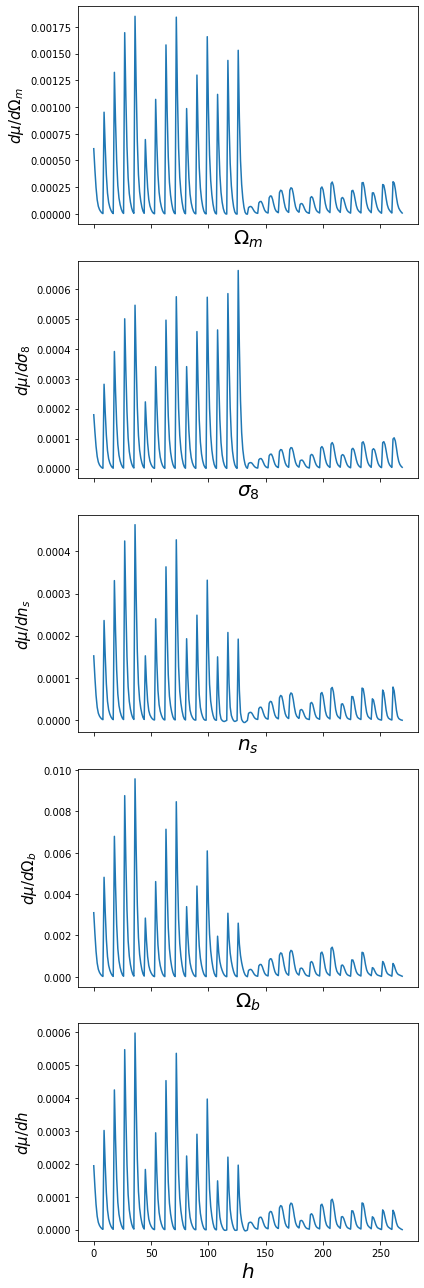

In [17]:
plot_derivatives("NTI_flatsky")

Sum of error for Omega_m is 0.05393
Sum of error for sigma_8 is 0.0166
Sum of error for n_spec is 0.00897
Sum of error for omb is 0.16035
Sum of error for h0 is 0.01144


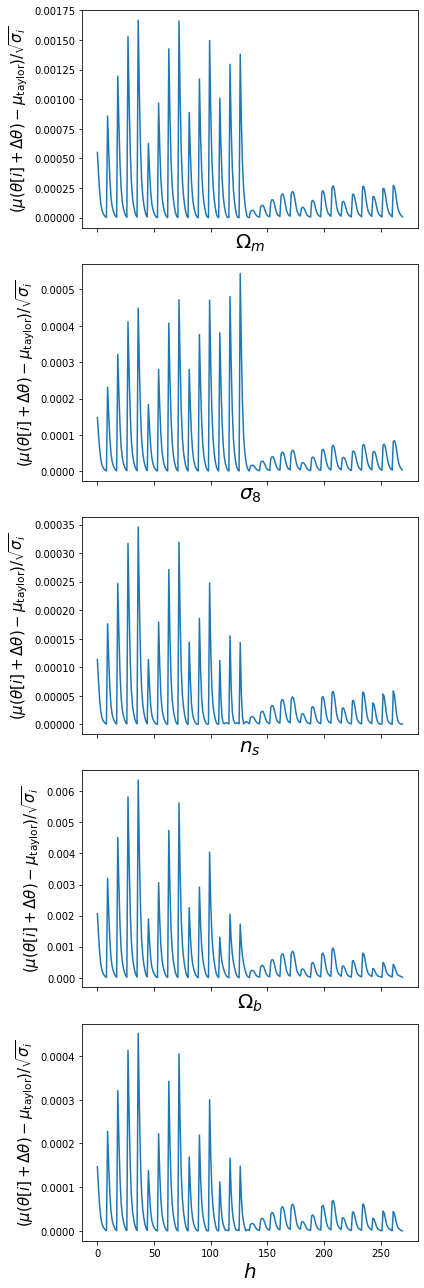

In [18]:
fig, ax = plt.subplots(5,1, figsize=(6,18), sharex=True)

xmatrix_filename = 'X_NTI_flatsky.npy'
Xmatrix = np.load(xmatrix_filename) 

for i,j in zip(range(len(bestfit_sigmas)), ['Omega_m', 'sigma_8','n_spec', 'omb', 'h0']): 
    taylor_theta = bestfit_sigmas[i] 
    mu_shifted = np.load("../CosmoCov/covs/xipm/NTI_flatsky_derivative_shift_{}/"
                         "vector_xipm_kids_NTI_flatsky_derivative_shift_{}.npy".format(j,j))
    #mu_shifted = np.load("../CosmoCov/covs/xipm/taylor_test_derivative_shift_{}/"
    #                     "vector_xipm_kids_taylor_test_derivative_shift_{}.npy".format(j,j))
    
    taylor_deriv = mu_cosmolike[:,0] + taylor_theta * Xmatrix[i]
    error = abs(mu_shifted[:,0] - taylor_deriv)/bestfit_sigmas[i]
    
    ax[i].plot(error)
    ax[i].set_xlabel(label_list[i], fontsize=20) 
    ax[i].set_ylabel(r'$(\mu(\theta[i] + \Delta \theta) - \mu_{\mathrm{taylor}})/ \sqrt{\sigma_{i}} $',
                    fontsize=15)
    
    print('Sum of error for {} is {}'.format(j,np.round(np.sum(error),5)))
    

plt.subplots_adjust(top = 0.98, bottom = 0.02, right = 1, left = 0, hspace = 0.07, wspace = 0.05)
fig.tight_layout()
fig.savefig('derivatives_check_at1sigma_flatsky.pdf')